# Industrial Copper Modelling

# 1. Import Libraries

In [1]:
#[Data Transformation]
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from collections import Counter

#[Data Visualization]
import matplotlib.pyplot as plt
import seaborn as sns

#[Pre-processing]
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # tune up model

#[Balance data]
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#[Model]
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score     
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

#[Metrics]
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

#[Algorithm]
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier

#[Functions]
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

# 2. Load Data

In [2]:
# Read data using pandas
df = pd.read_csv("Data/Copper_data.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


**About the Data:**
1. `id`: This column likely serves as a unique identifier for each transaction or item, which can be useful for tracking and record-keeping.
2. `item_date`: This column represents the date when each transaction or item was recorded or occurred. It's important for tracking the timing of business activities.
3. `quantity tons`: This column indicates the quantity of the item in tons, which is essential for inventory management and understanding the volume of products sold or produced.
4. `customer`: The "customer" column refers to the name or identifier of the customer who either purchased or ordered the items. It's crucial for maintaining customer relationships and tracking sales.
5. `country`: The "country" column specifies the country associated with each customer. This information can be useful for understanding the geographic distribution of customers and may have implications for logistics and international sales.
6. `status`: The "status" column likely describes the current status of the transaction or item. This information can be used to track the progress of orders or transactions, such as "Draft" or "Won."
7. `item type`: This column categorizes the type or category of the items being sold or produced. Understanding item types is essential for inventory categorization and business reporting.
8. `application`: The "application" column defines the specific use or application of the items. This information can help tailor marketing and product development efforts.
9. `thickness`: The "thickness" column provides details about the thickness of the items. It's critical when dealing with materials where thickness is a significant factor, such as metals or construction materials.
10. `width`: The "width" column specifies the width of the items. It's important for understanding the size and dimensions of the products.
11. `material_ref`: This column appears to be a reference or identifier for the material used in the items. It's essential for tracking the source or composition of the products.
12. `product_ref`: The "product_ref" column seems to be a reference or identifier for the specific product. This information is useful for identifying and cataloging products in a standardized way.
13. `delivery date`: This column records the expected or actual delivery date for each item or transaction. It's crucial for managing logistics and ensuring timely delivery to customers.
14. `selling_price`: The "selling_price" column represents the price at which the items are sold. This is a critical factor for revenue generation and profitability analysis.

# 3. Data Preparation

In [3]:
# How much data
df.shape

(181673, 14)

In [4]:
#basic information about the dataset
# Checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# Convert datatypes
df["quantity tons"] = pd.to_numeric(df['quantity tons'], errors='coerce') # to handle non-numeric values
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [6]:
# Get the summary statistics for numerical variables
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
id,181671,181671,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1
status,181671,9,Won,116010
item type,181673,7,W,105615
material_ref,103754,16563,DX51D+Z,922
item_date_1,181670,250,2020-12-02,2779
delivery date_1,181670,26,2021-01-01,33033


In [8]:
# Get summary of all columns
summary = df.describe(include='all')
print(summary)

                                          id     item_date  quantity tons  \
count                                 181671  1.816720e+05   1.816720e+05   
unique                                181671           NaN            NaN   
top     EC06F063-9DF0-440C-8764-0B0C05A4F6AE           NaN            NaN   
freq                                       1           NaN            NaN   
mean                                     NaN  2.020459e+07   5.874926e+03   
std                                      NaN  4.551119e+03   2.349081e+06   
min                                      NaN  1.995000e+07  -2.000000e+03   
25%                                      NaN  2.020093e+07   1.097030e+01   
50%                                      NaN  2.020113e+07   3.036464e+01   
75%                                      NaN  2.021020e+07   6.716061e+01   
max                                      NaN  2.021040e+07   1.000000e+09   

            customer        country  status item type    application  \
cou

In [9]:
# Check for missing values
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

**Inference**
- The dataset consists of **181673** rows and **16** columns.
- The data types seen area **object, int64, float64**.
- Most of the columns has minimum nos. of missing values (id, item_date, customer, country, status, application, thickness, delivery date, selling_price).
- **material_ref** has 77,919 (43%) missing values.
- **quantity tons, selling_price** has negative values. These columns cannot be negative.
- Categorical variables are *id, item_date, delivery date, customer, country, status, material_ref, product_ref, item type, application*.
- Continuous variables are *quantity tons, thickness, width, selling_price*.

# 4. EDA

In [10]:
# Convert the values starting with "0000" in material_ref to nan
df["material_ref"] = df["material_ref"].apply(lambda x: np.nan if str(x)[:4]=="0000" else x)
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [11]:
# Check for missing values
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery date_1         3
dtype: int64

**Info**
- Now more than 55% of *material_ref* column has missing values. Hence this column can be dropped.
- *id* column has complete unique values which can be of no use and hence can be dropped.

## 4.1 Irrelevant Features Removal

In [12]:
# Drop columns
df.drop(columns=["id", "material_ref"], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [13]:
# Negative values are seen in quantity tons and selling_price which cannot be < or = 0
df["quantity tons"] = df["quantity tons"].apply(lambda x:np.nan if x<=0 else x)
df["selling_price"] = df["selling_price"].apply(lambda x:np.nan if x<=0 else x)
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816650e+05
mean,2.020459e+07,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918124e+03
std,4.551119e+03,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.318020e+05
min,1.995000e+07,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,1.000000e-01
25%,2.020093e+07,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


## 4.2 Missing values

In [14]:
# Check for missing values
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

In [15]:
# datatypes
df.dtypes

item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery date_1     object
dtype: object

In [16]:
# Handling null values 
# Object data types are filled using mode (the value which frequently appears in the dataset)
# Numerical data types are filled using median (the middle value in the dataset)

# Object datatype using mode
df["item_date"].fillna(df["item_date"].mode().iloc[0], inplace= True) # takes the first value form mode series
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0], inplace= True)
df["status"].fillna(df["status"].mode().iloc[0], inplace= True)
df["delivery date"].fillna(df["delivery date"].mode().iloc[0], inplace= True)
df["delivery date_1"].fillna(df["delivery date_1"].mode().iloc[0], inplace= True)

# Numerical datatype using median
df["quantity tons"].fillna(df["quantity tons"].median(), inplace= True)
df["customer"].fillna(df["customer"].median(), inplace= True)
df["country"].fillna(df["country"].median(), inplace= True)
df["application"].fillna(df["application"].median(), inplace= True)
df["thickness"].fillna(df["thickness"].median(), inplace= True)
df["selling_price"].fillna(df["selling_price"].median(), inplace= True)

In [17]:
# Check for missing values
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

## 4.3 Encoding
Categorical variables cannot be directly processed by machine learning models. To address this, we use encoding techniques to convert categorical data into numerical form.

In [18]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [19]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

**Note:**
- The *"status"* column needs to be transformed into numerical values to be compatible with machine learning algorithms. We'll use the `map` method to specifically encode "won" and "lost" values to distinct numerical labels, highlighting their importance in predicting future outcomes.

- Additionally, the *"item type"* column contains categories with a natural order. To leverage this inherent order and potentially improve model performance, we'll apply ordinal encoding to this column. This will assign numerical labels that reflect the existing order of the item types.

In [20]:
# convert categorical data into numerical data - using map and ordinal encoder methods
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
                                 
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


## 4.4 Treat Skewness 

In [21]:
continuous_features = ["quantity tons", "thickness", "width", "selling_price"]

In [22]:
# Comparison - box plot, hist plot, and violin plot
def plot(df, column):
    plt.figure(figsize=(20,5), dpi=300)
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')

    plt.show()

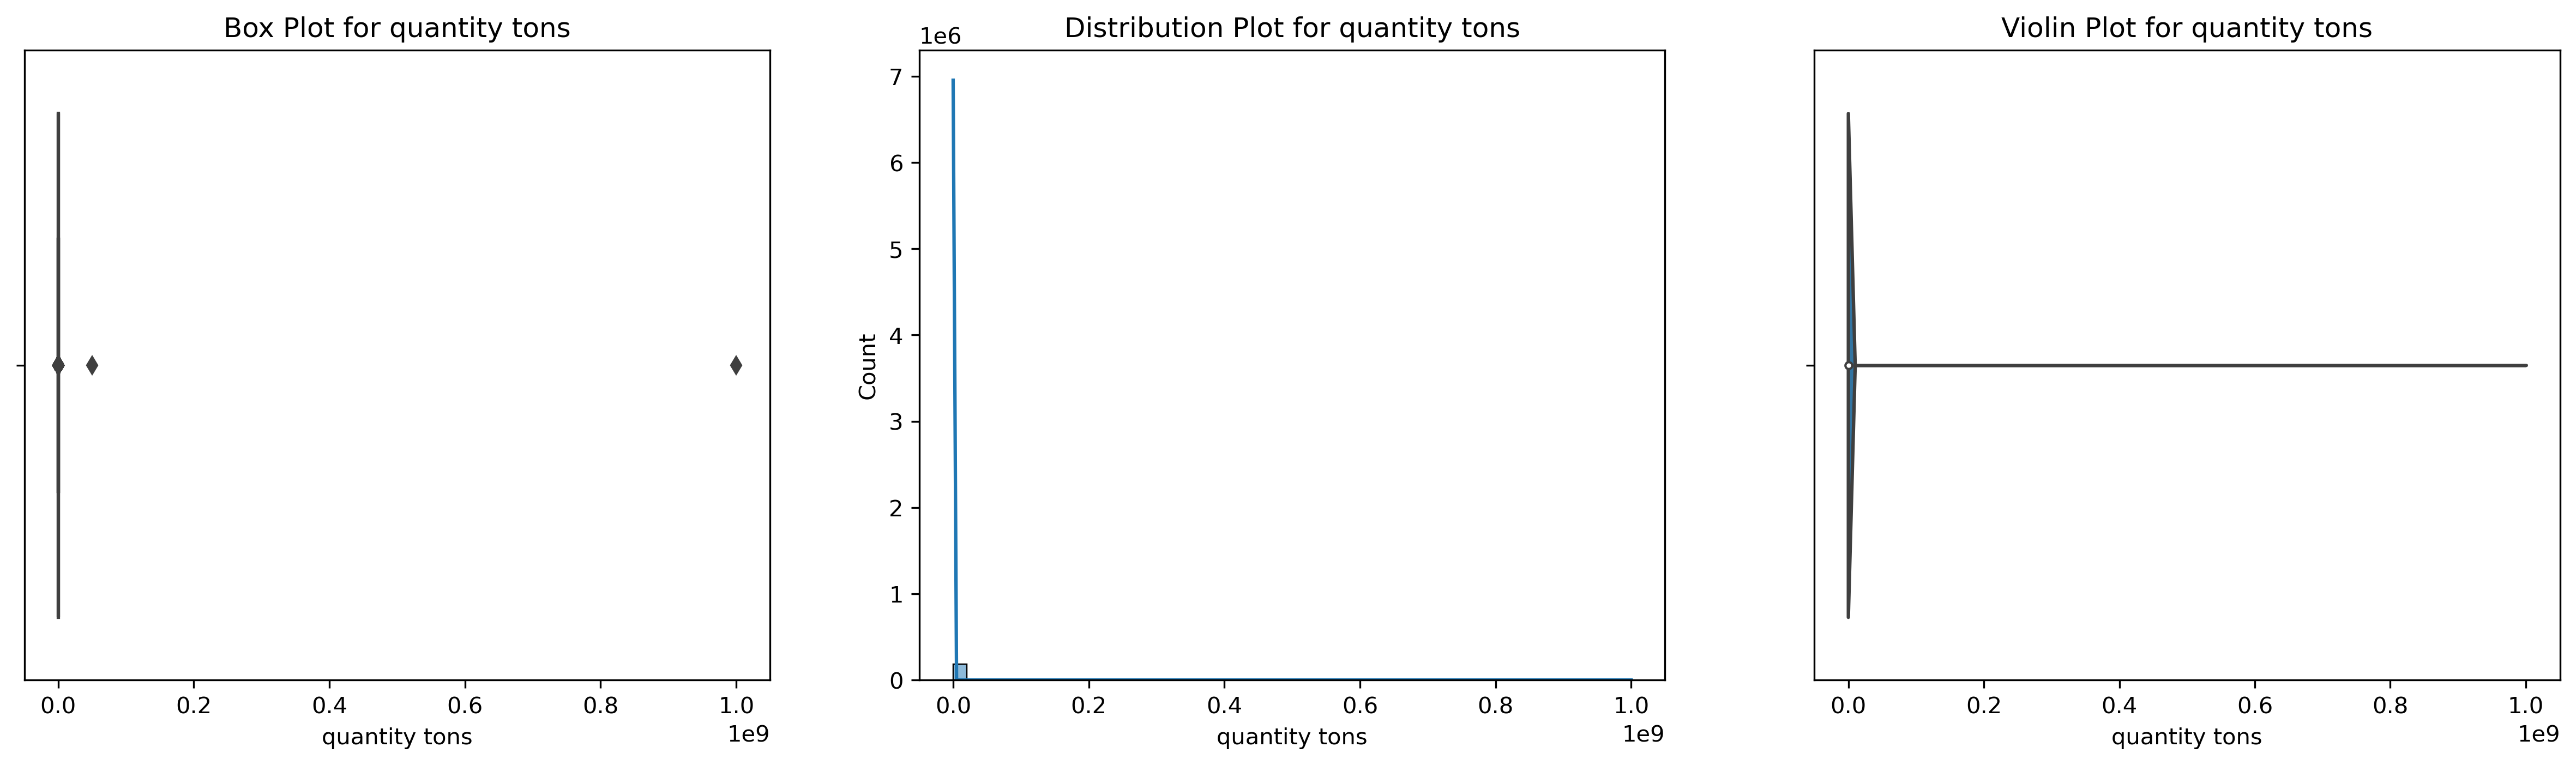

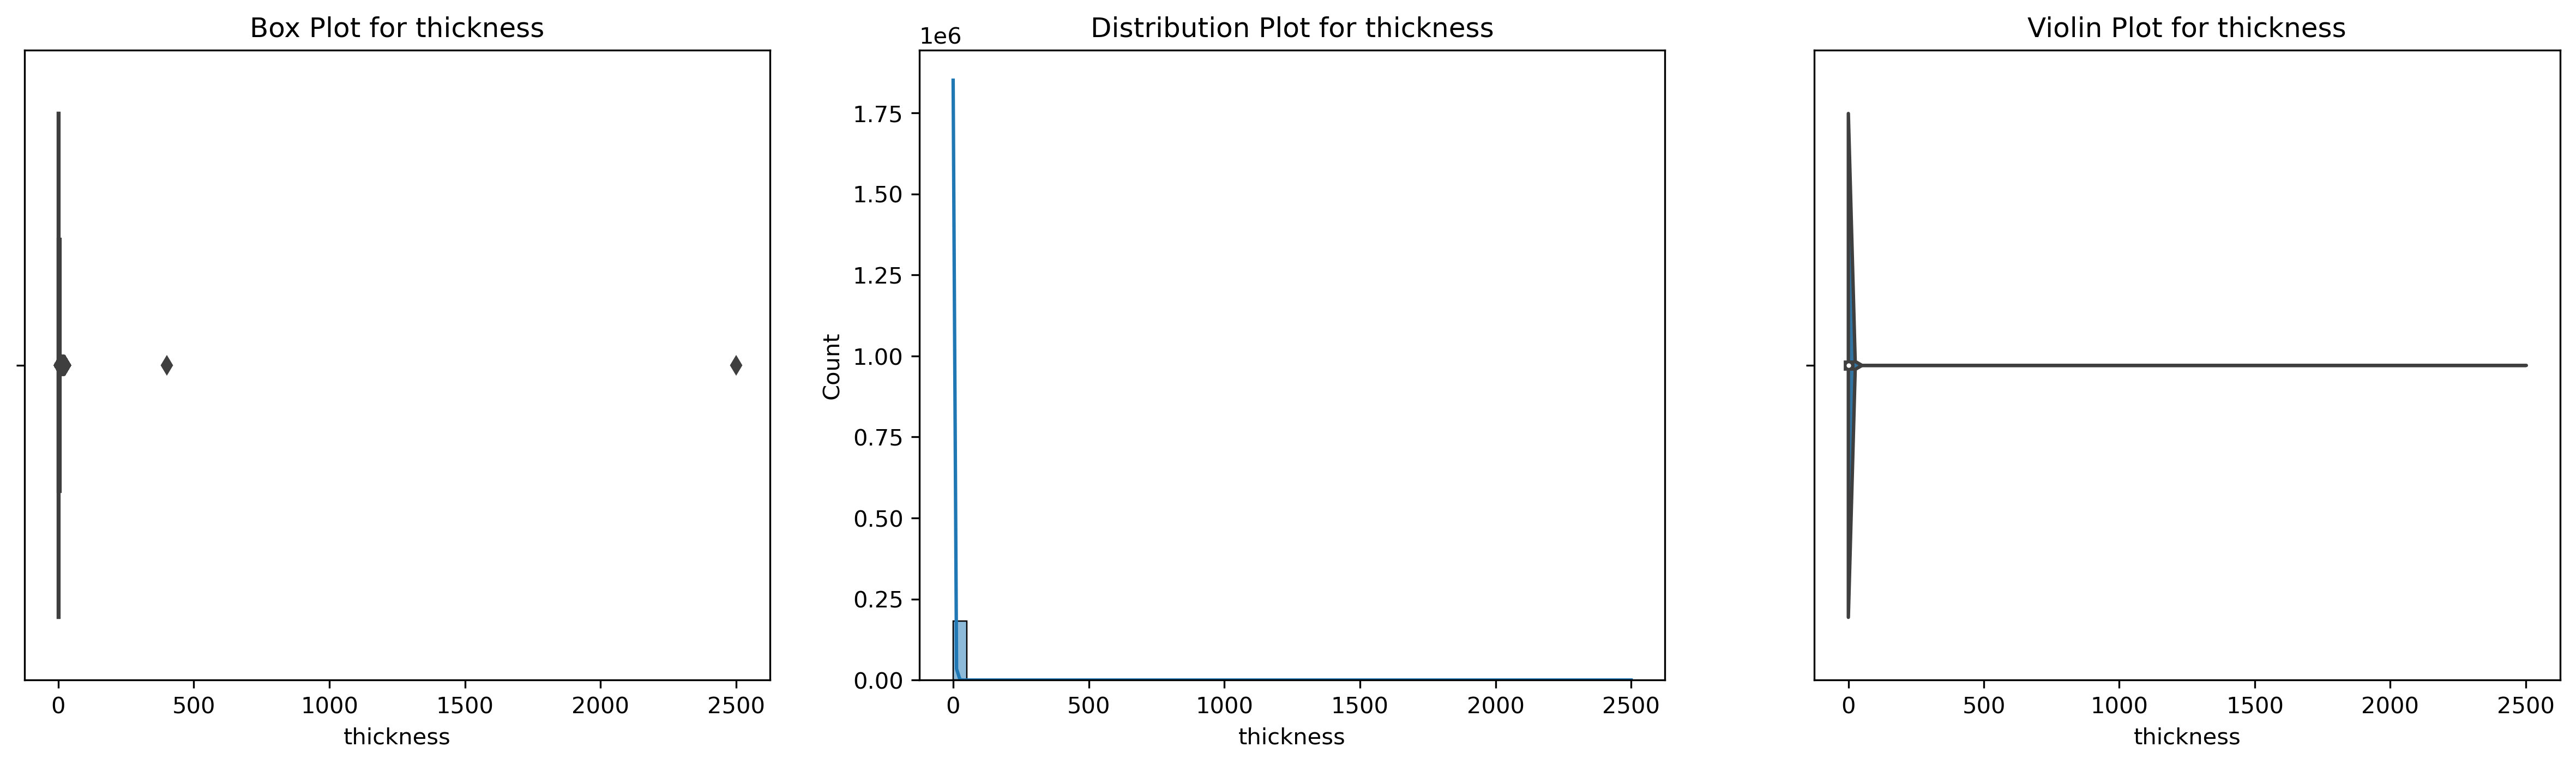

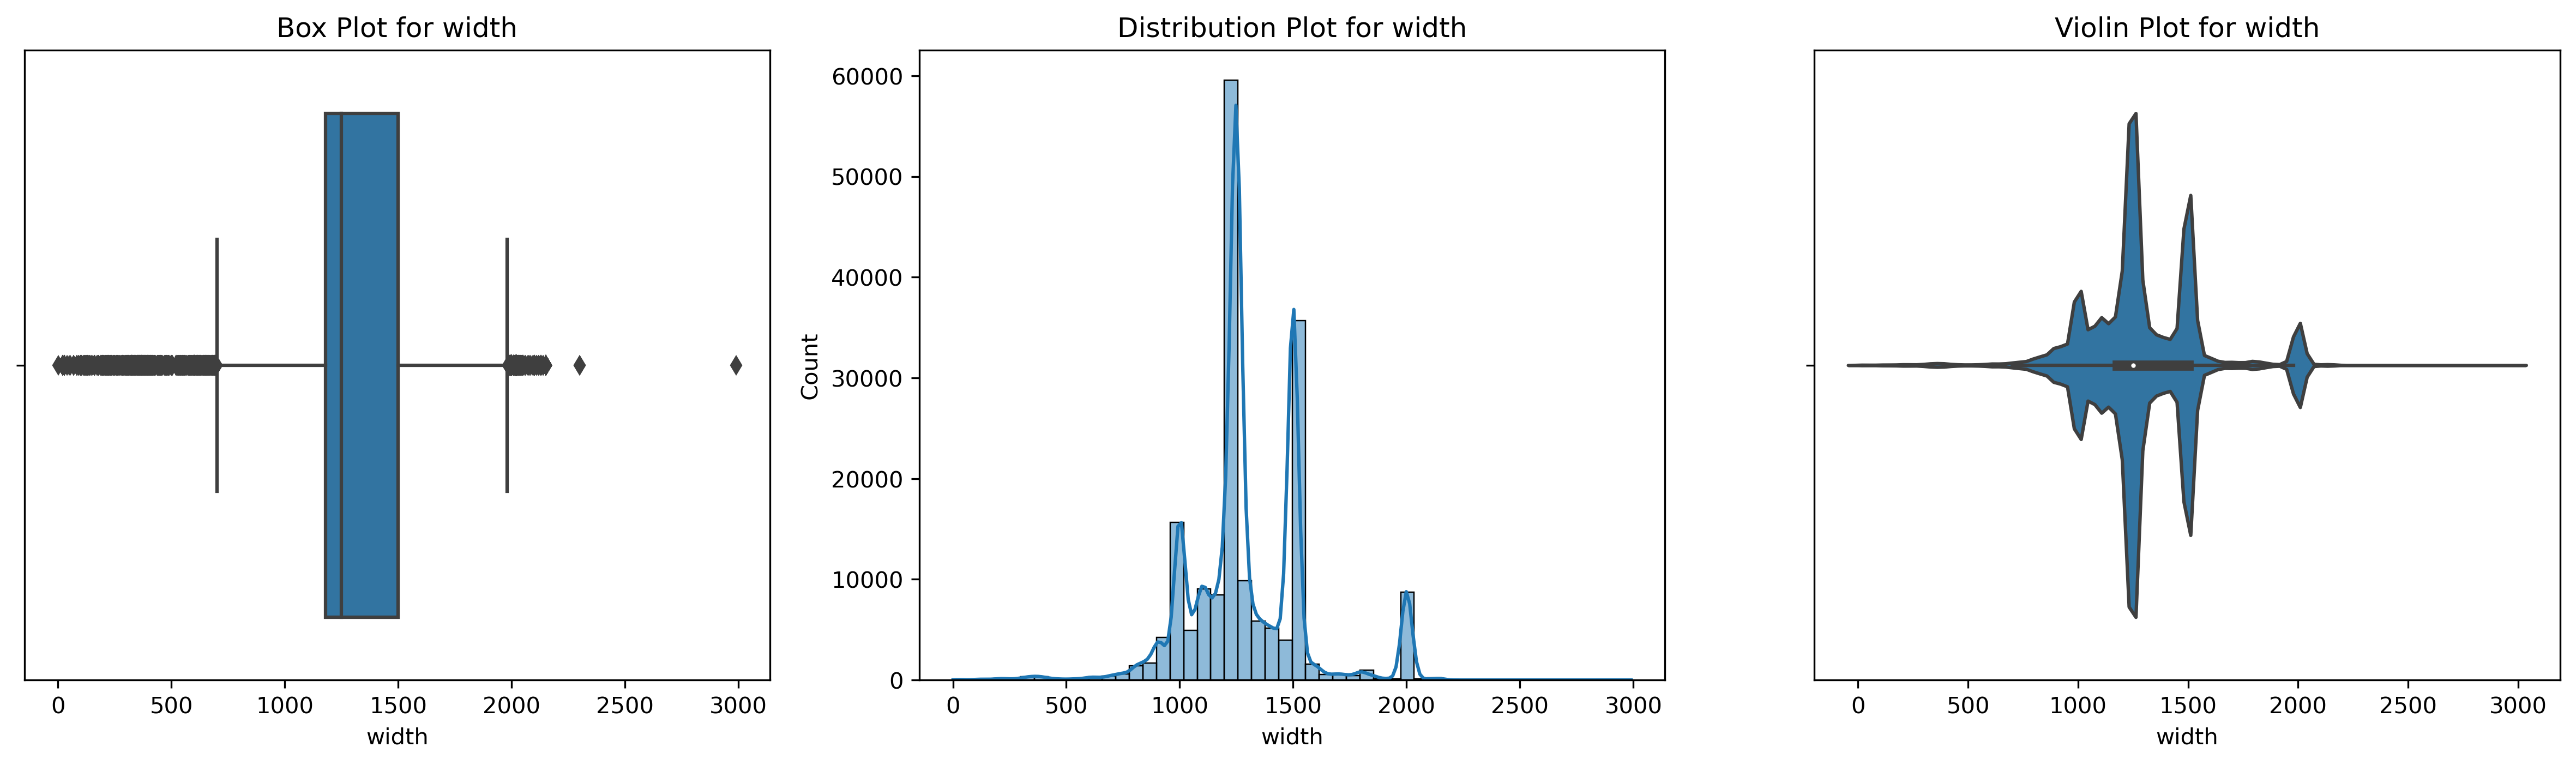

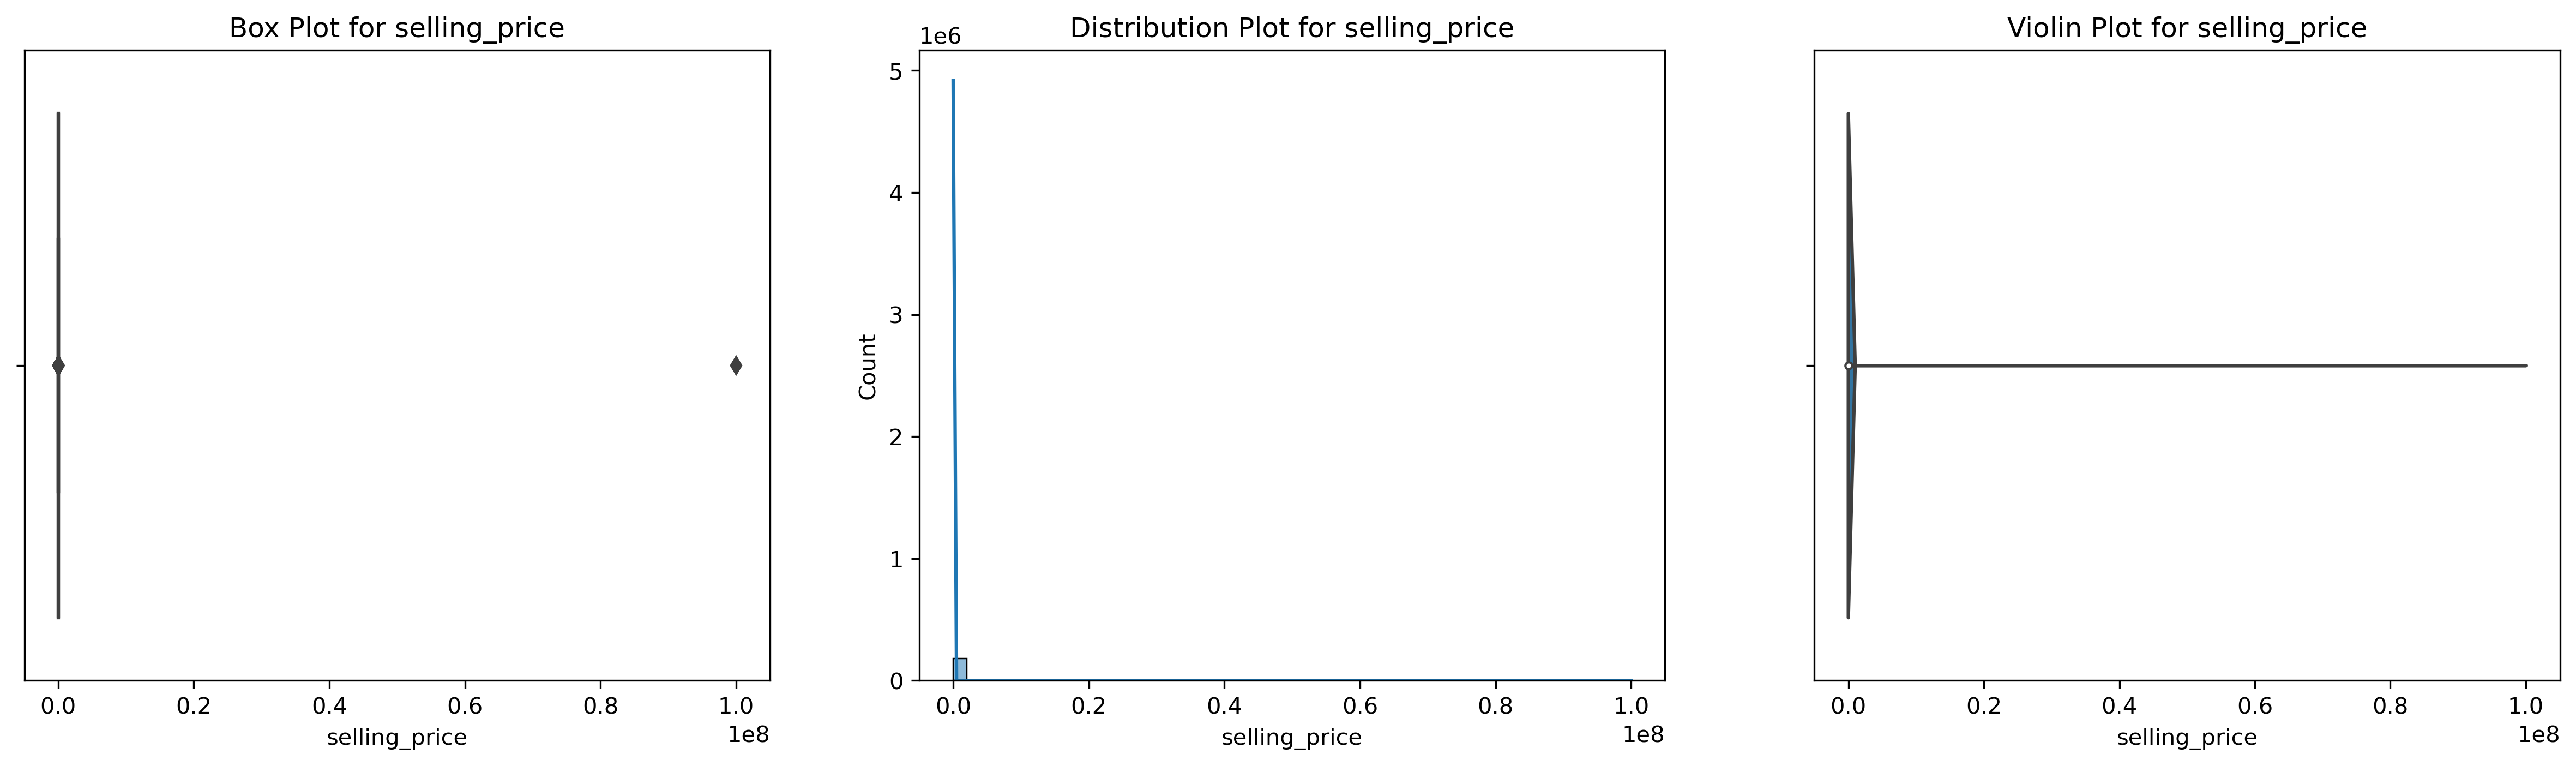

In [23]:
# Visualize columns before treating skewness 
for i in continuous_features:
    plot(df, i)

In [24]:
# Measure skewness in the numerical features
numerical_features = df[continuous_features]  
skewness = numerical_features.skew()
print(skewness)

quantity tons    424.690816
thickness        303.447571
width              0.374597
selling_price    301.388088
dtype: float64


**Note:**
- Skewness of *"width"* is >-0.5 and <0.5, hence no transformation is required (fairly symmetrical, low skewness).
- Appropriate data transformation is needed to be applied on *quantity tons, thickness, selling_price*.

In [25]:
# Apply log transform to skewed data
# Add 1 to avoid negative values
df["quantity_tons_log"] = np.log(1 + (df["quantity tons"]))
df["thickness_log"] = np.log(1 + (df["thickness"]))
df["selling_price_log"] = np.log(1 + (df["selling_price"]))

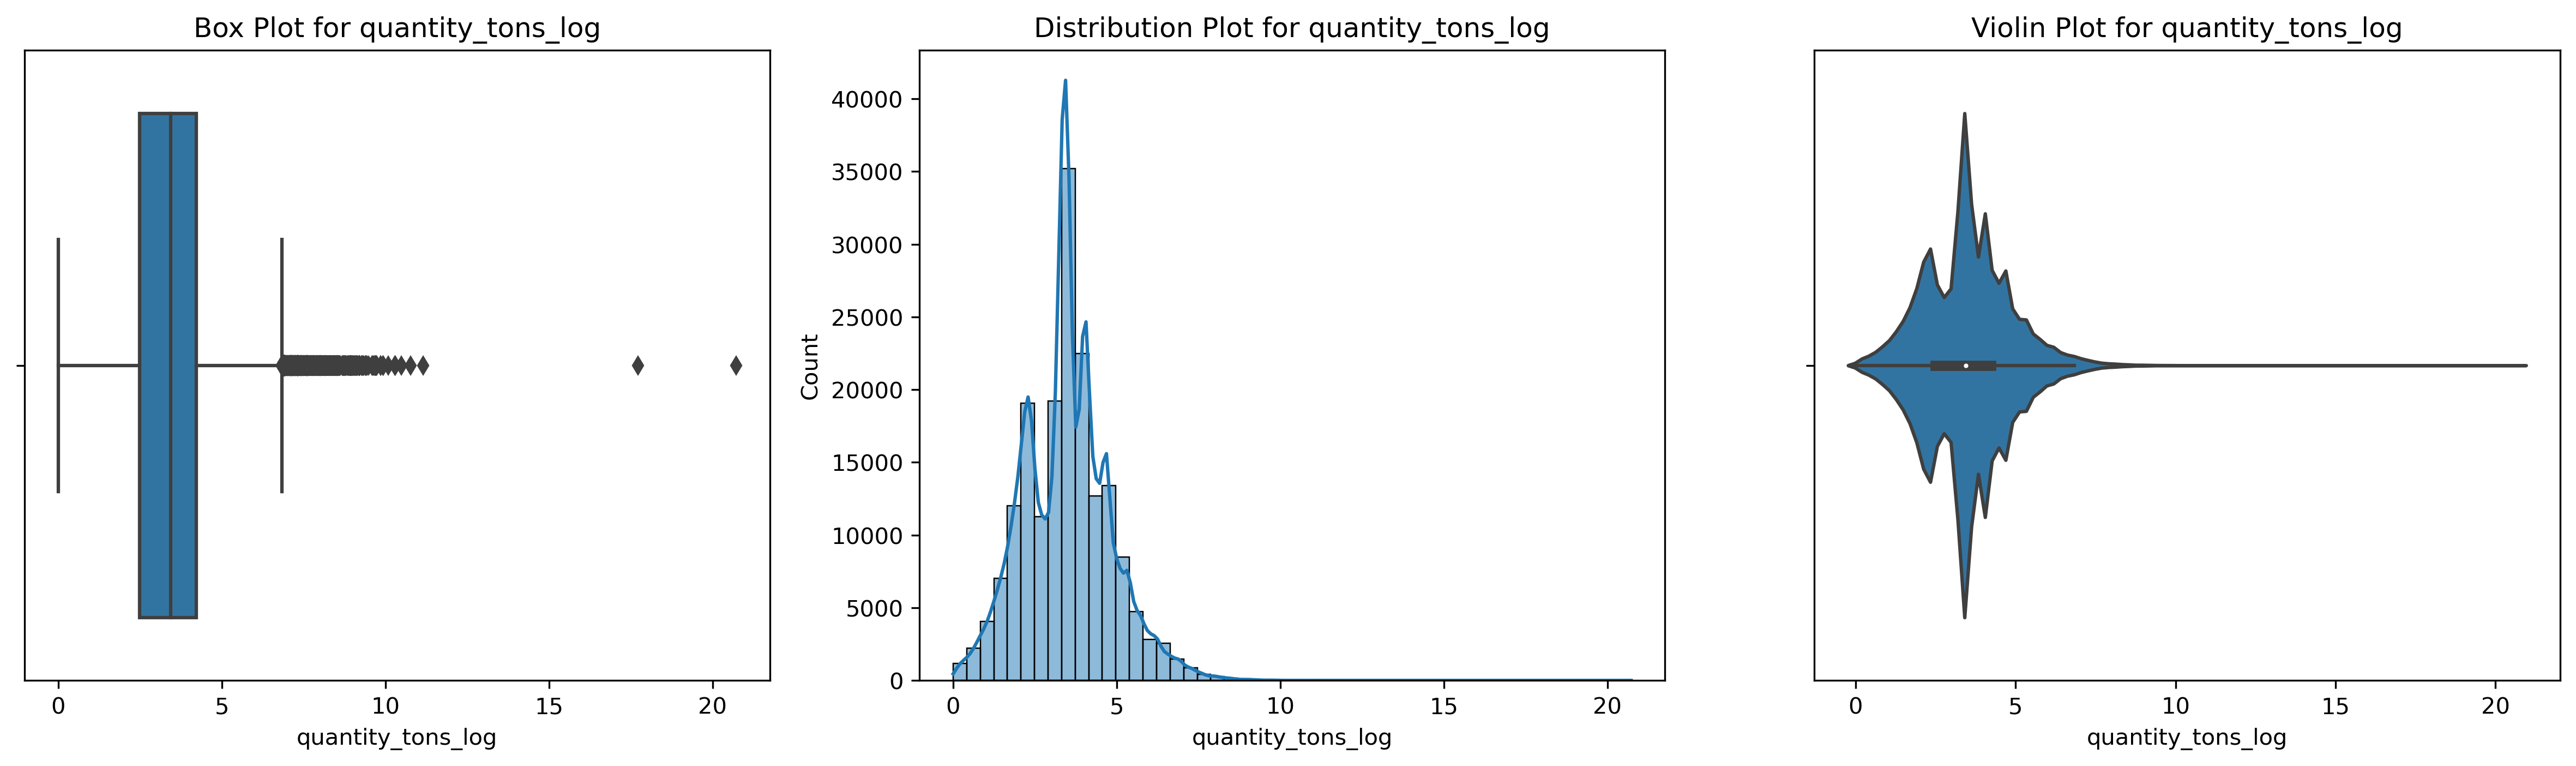

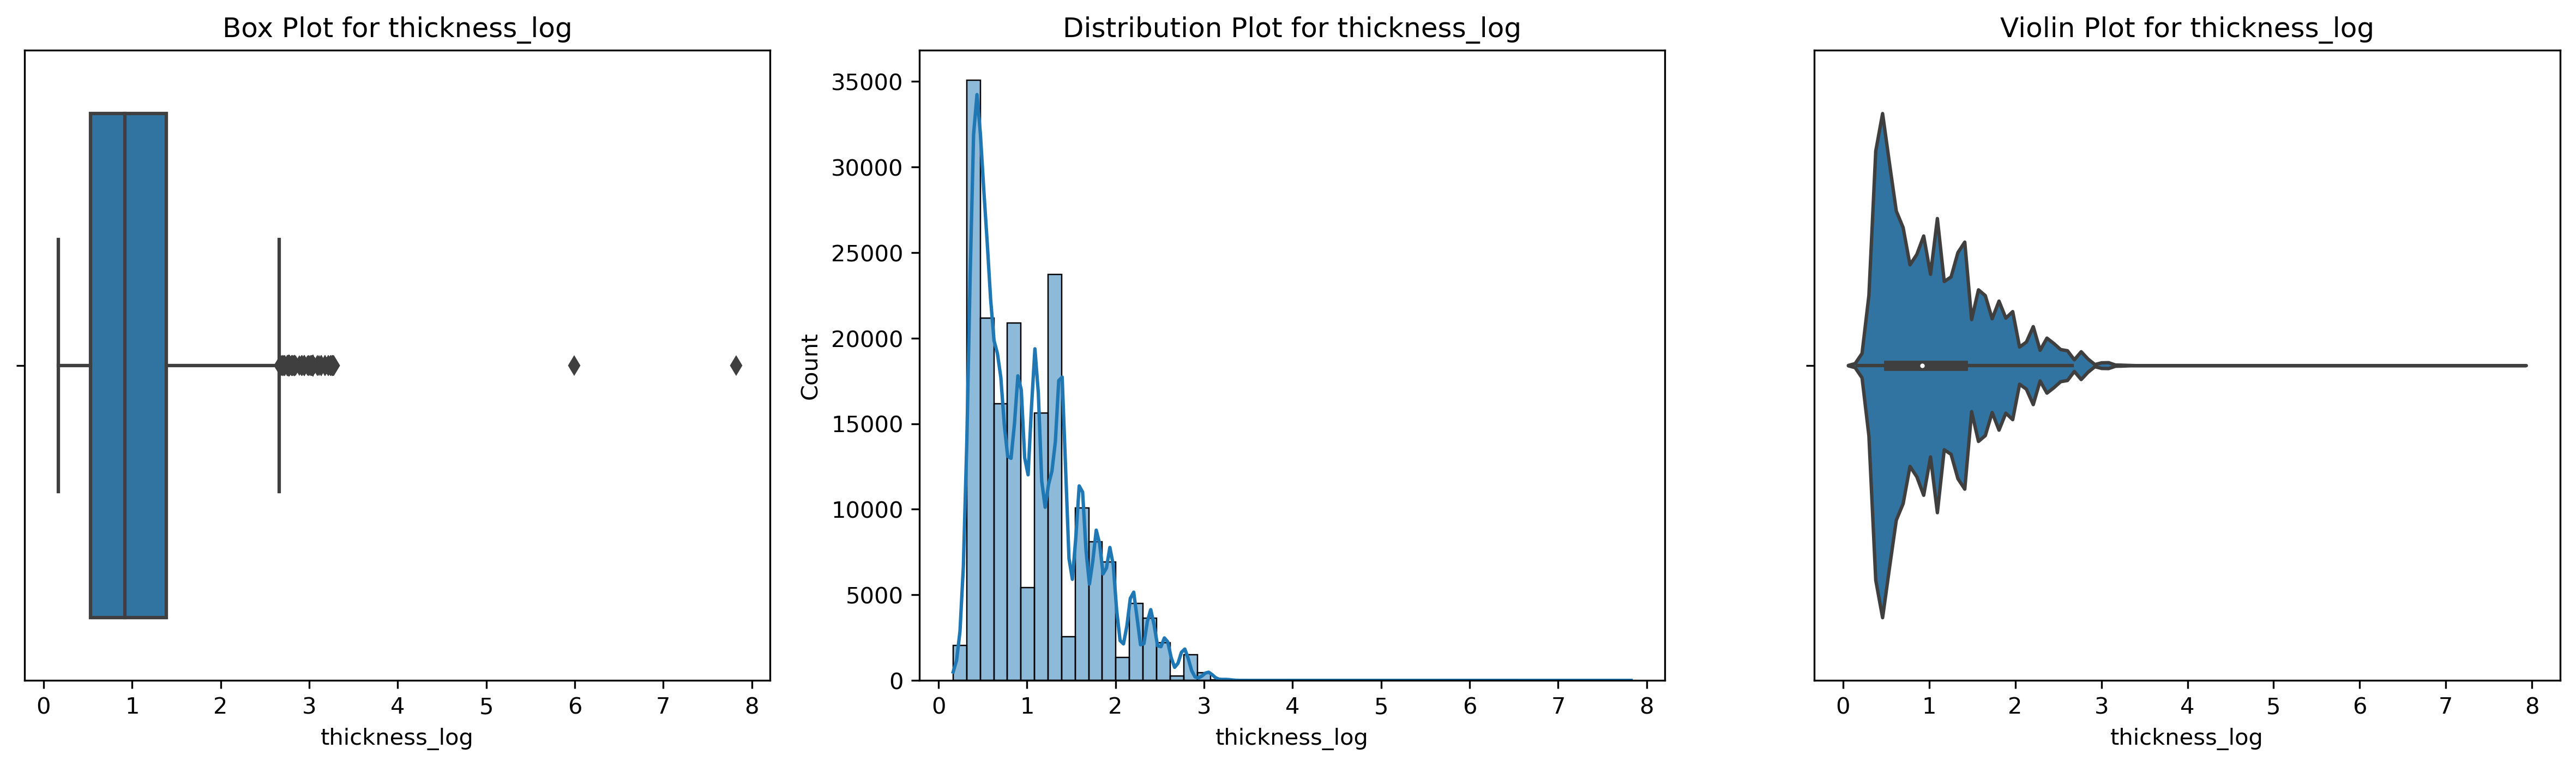

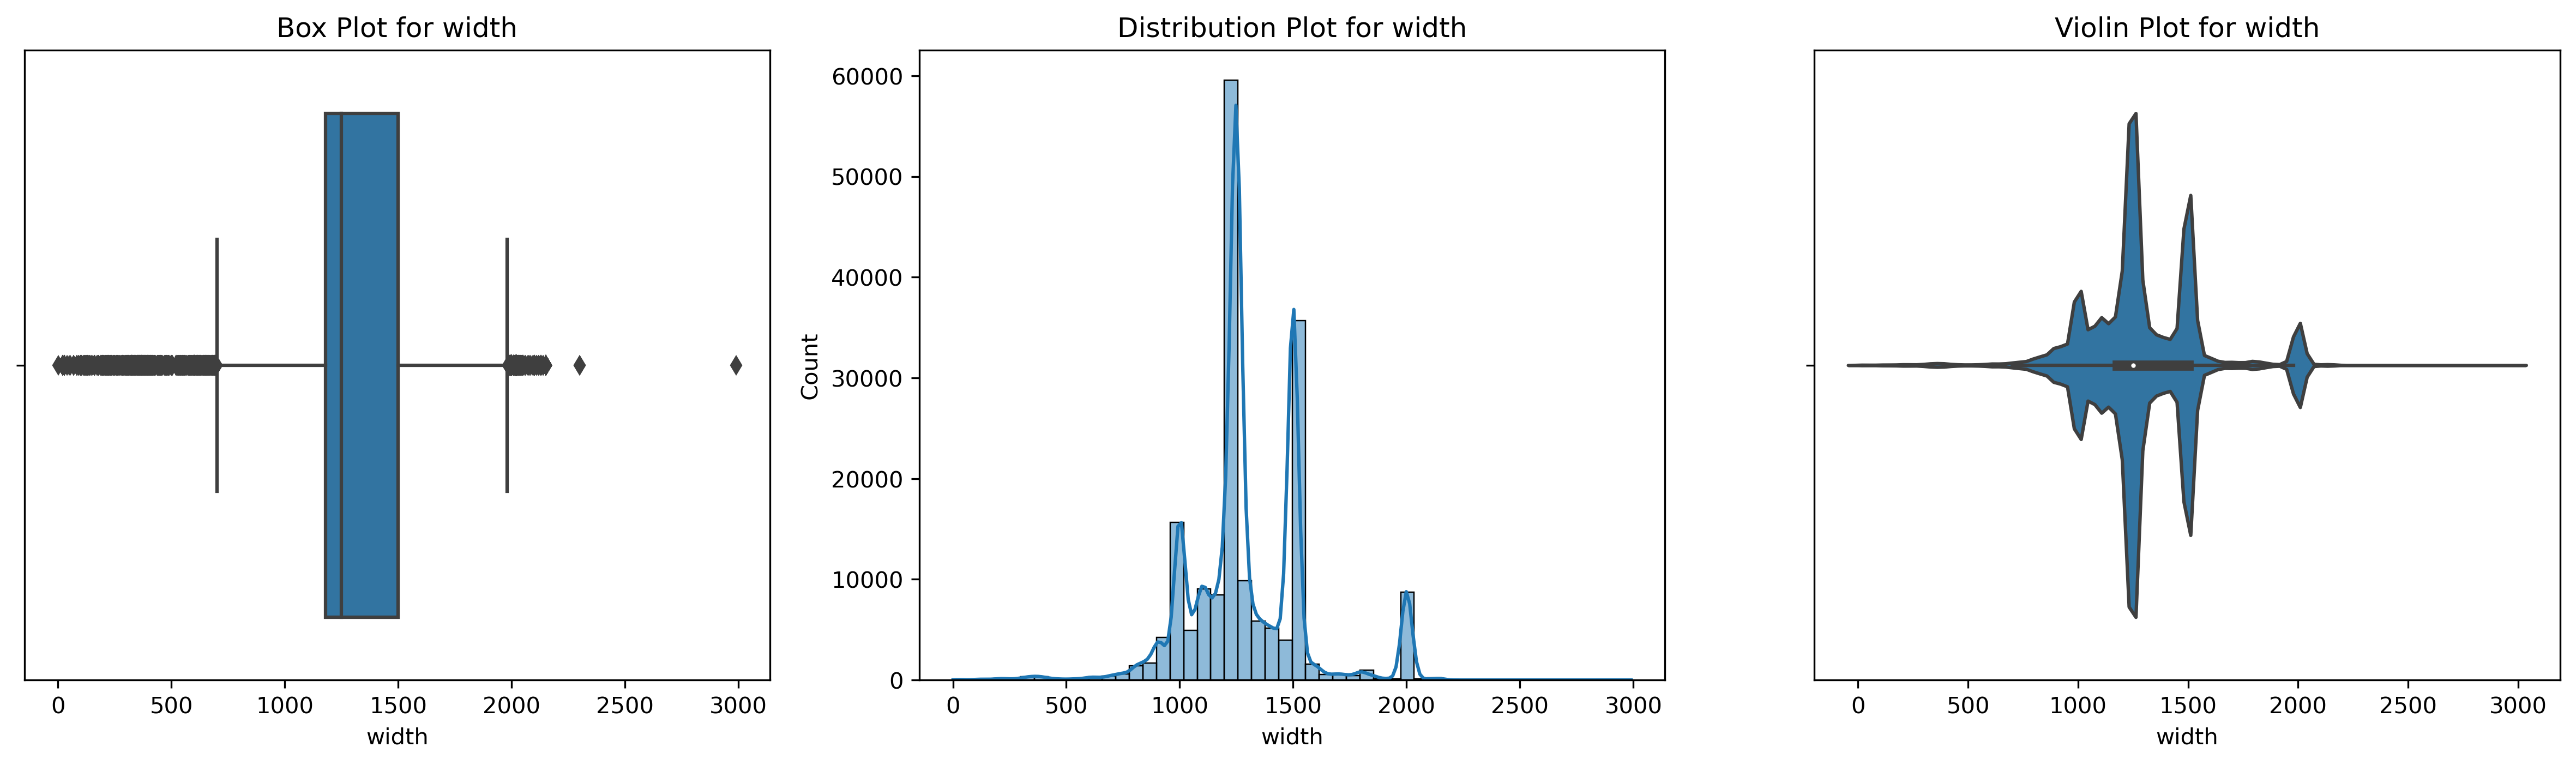

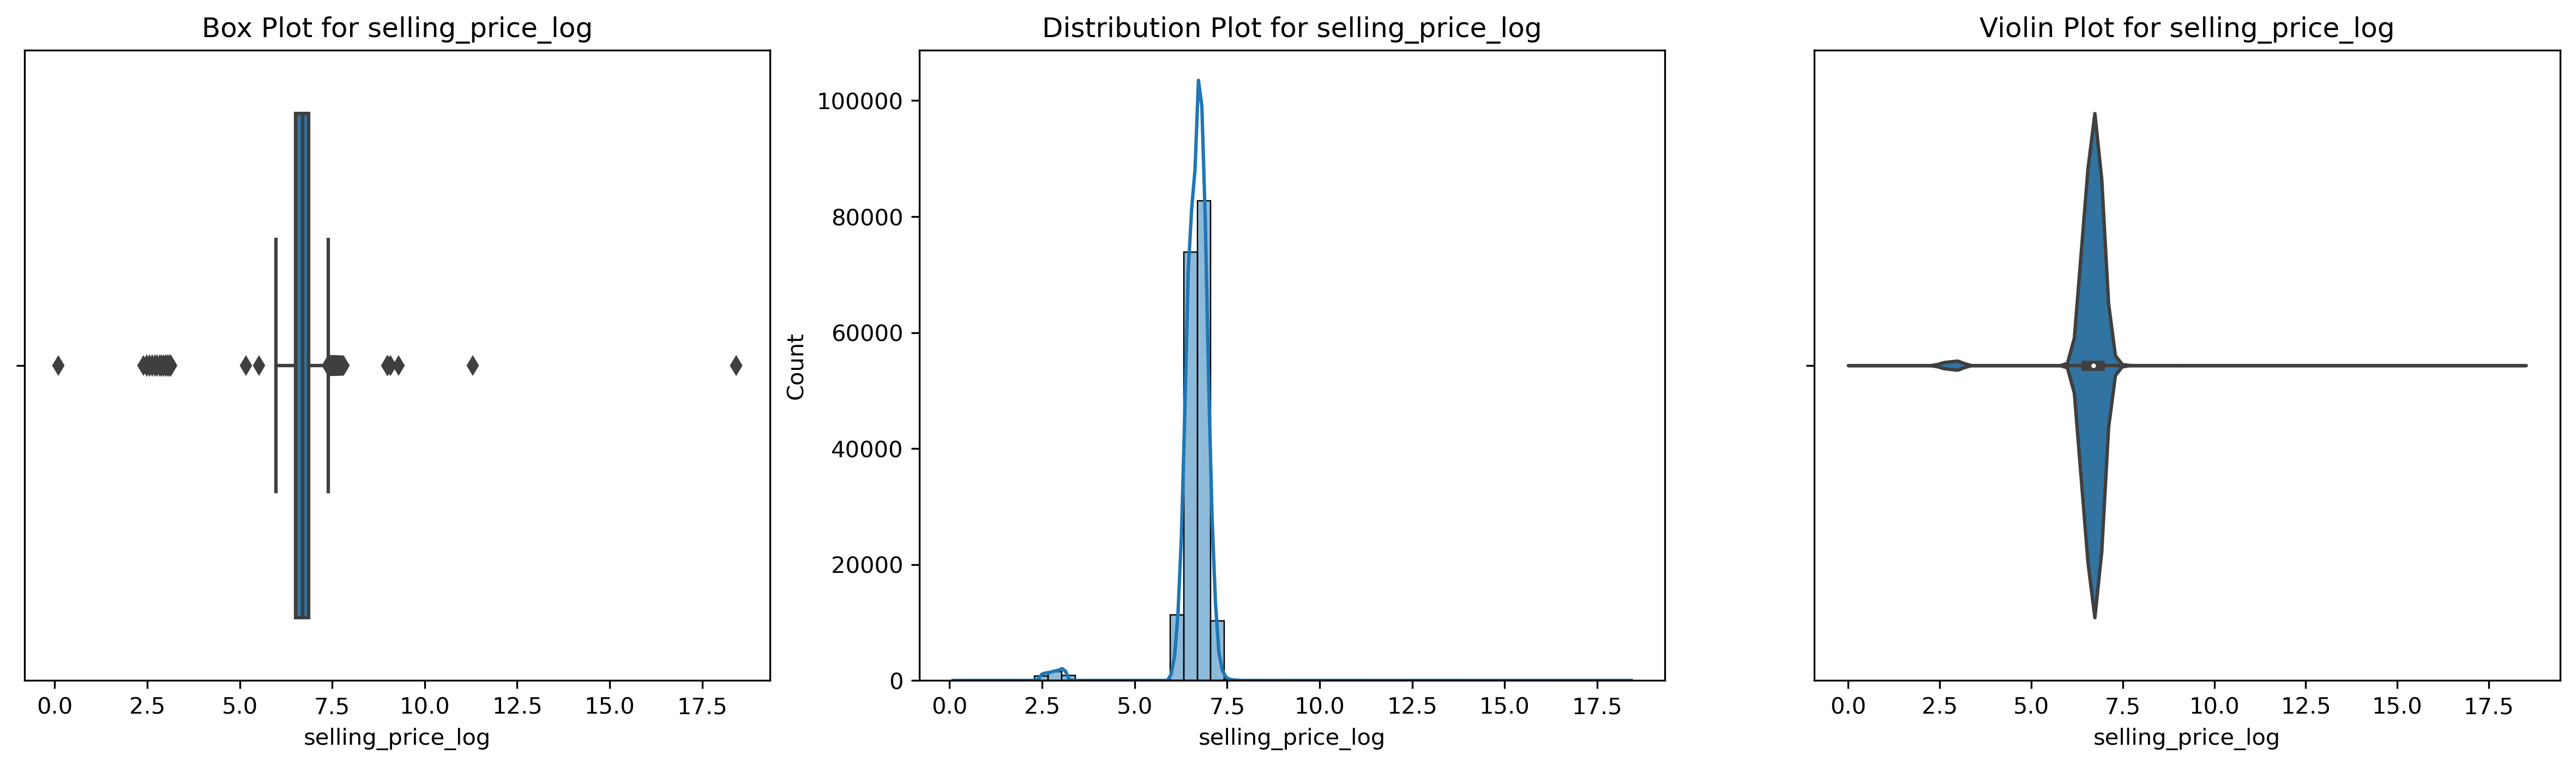

In [26]:
# Visualize columns after treating skewness 
for i in ["quantity_tons_log", "thickness_log", "width", "selling_price_log"]:
    plot(df, i)

In [27]:
# Measure skewness in the numerical features
numerical_features = df[["quantity_tons_log", "thickness_log", "width", "selling_price_log"]]  
skewness = numerical_features.skew()
print(skewness)

quantity_tons_log    0.338458
thickness_log        0.862494
width                0.374597
selling_price_log   -5.275578
dtype: float64


## 4.5 Outliers Detection

**Note:**
- The data appears to be normal distributed, hence we apply Interquartile Range (IQR) method. 

In [28]:
def remove_outliers(df, column):
    """Interquartile Range (IQR) method based outlier removal"""
    percentile25 = df[column].quantile(0.25) # Q1
    percentile75 = df[column].quantile(0.75) # Q3
    iqr = percentile75-percentile25
    upper_lt = percentile75 + 1.5*iqr
    lower_lt = percentile25 - 1.5*iqr
    df[column] = df[column].clip(lower_lt, upper_lt)
    # df[column] = df[(df[column]>lower_lt) & (df[column]<upper_lt)]

In [29]:
# Removing outliers from the numerical columns of df
remove_outliers(df, "quantity_tons_log")
remove_outliers(df, "thickness_log")
remove_outliers(df, "width")
remove_outliers(df, "selling_price_log")

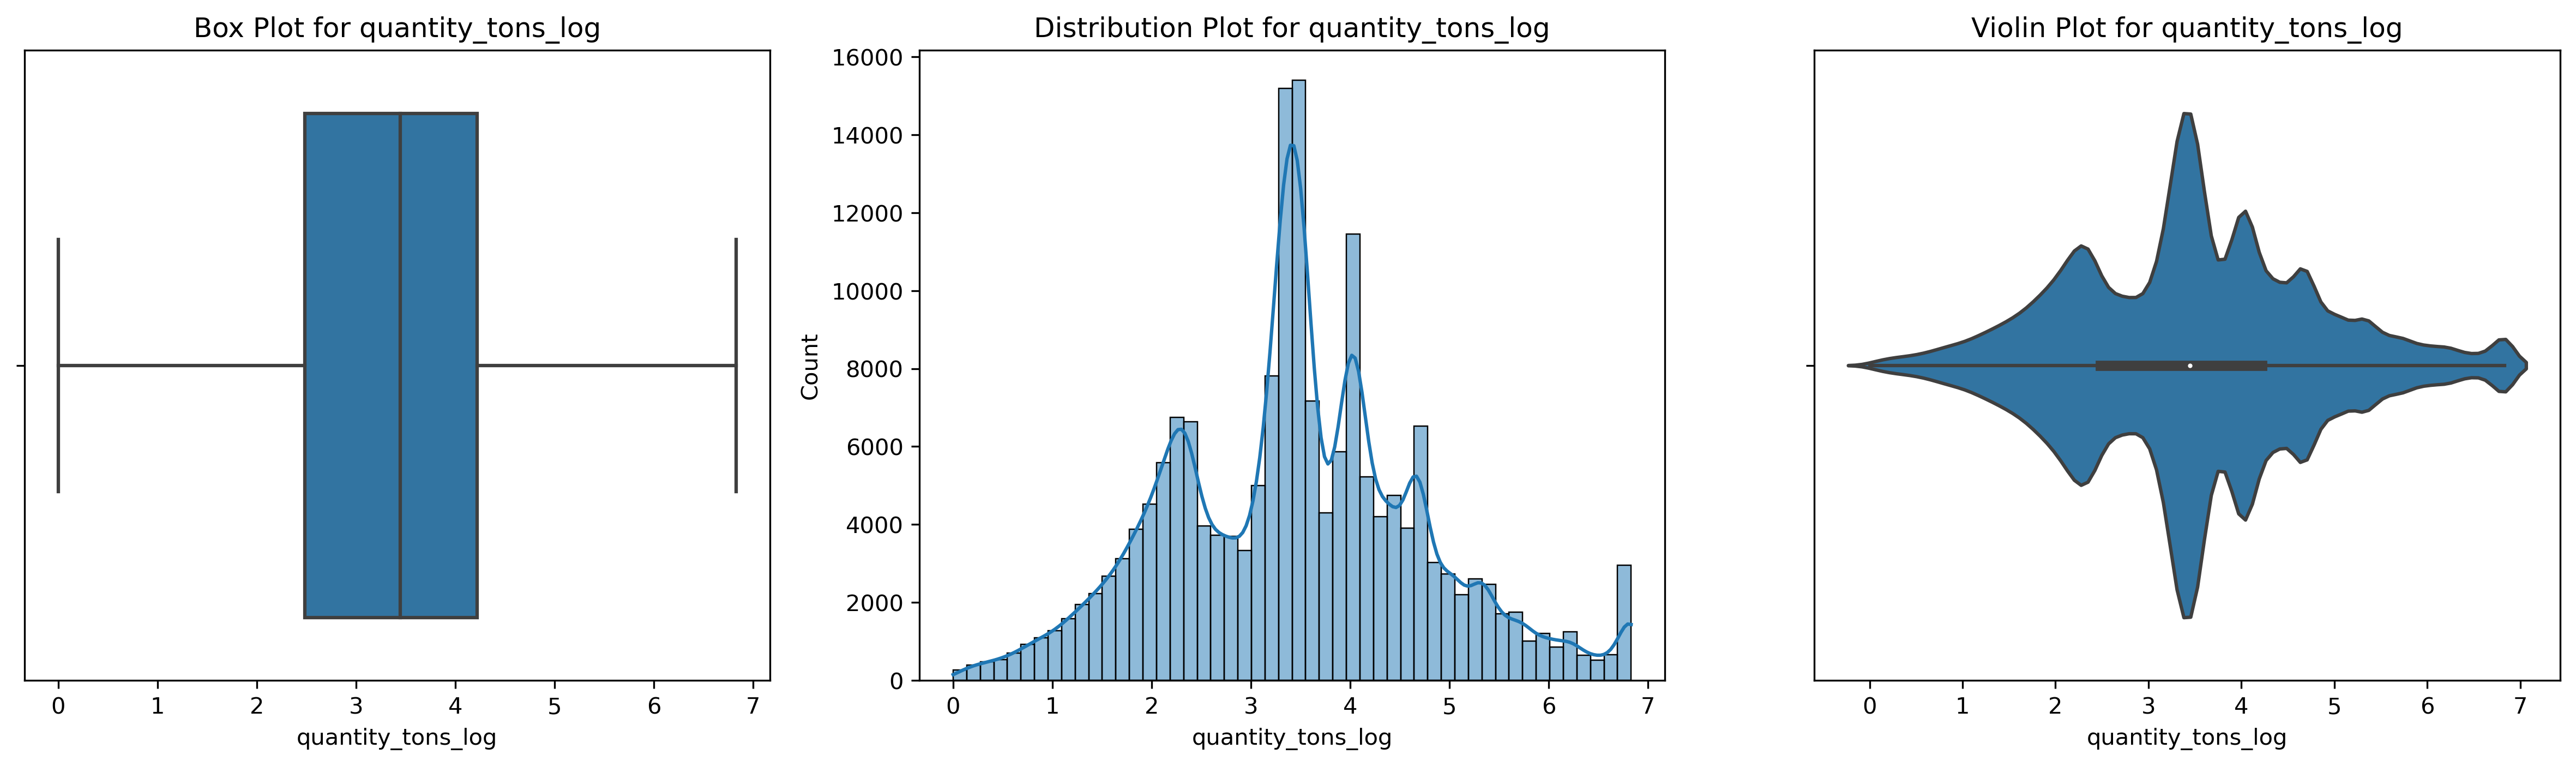

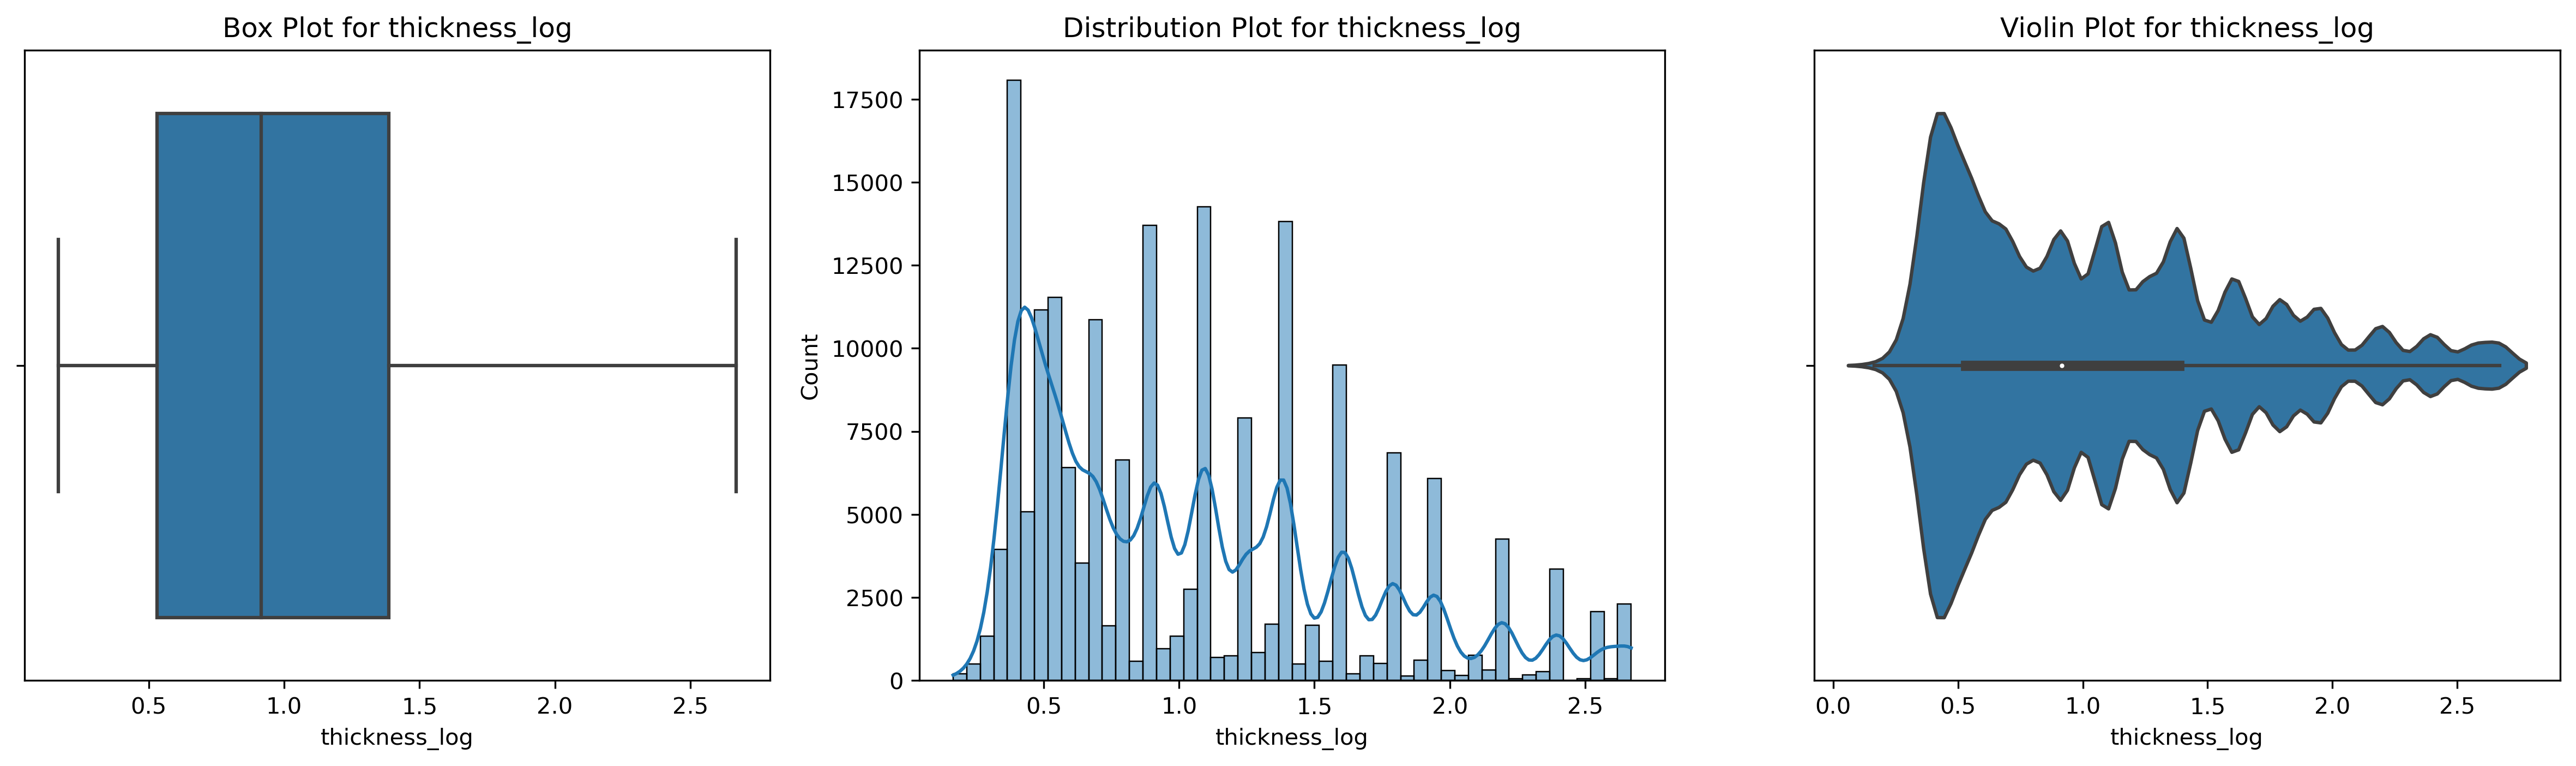

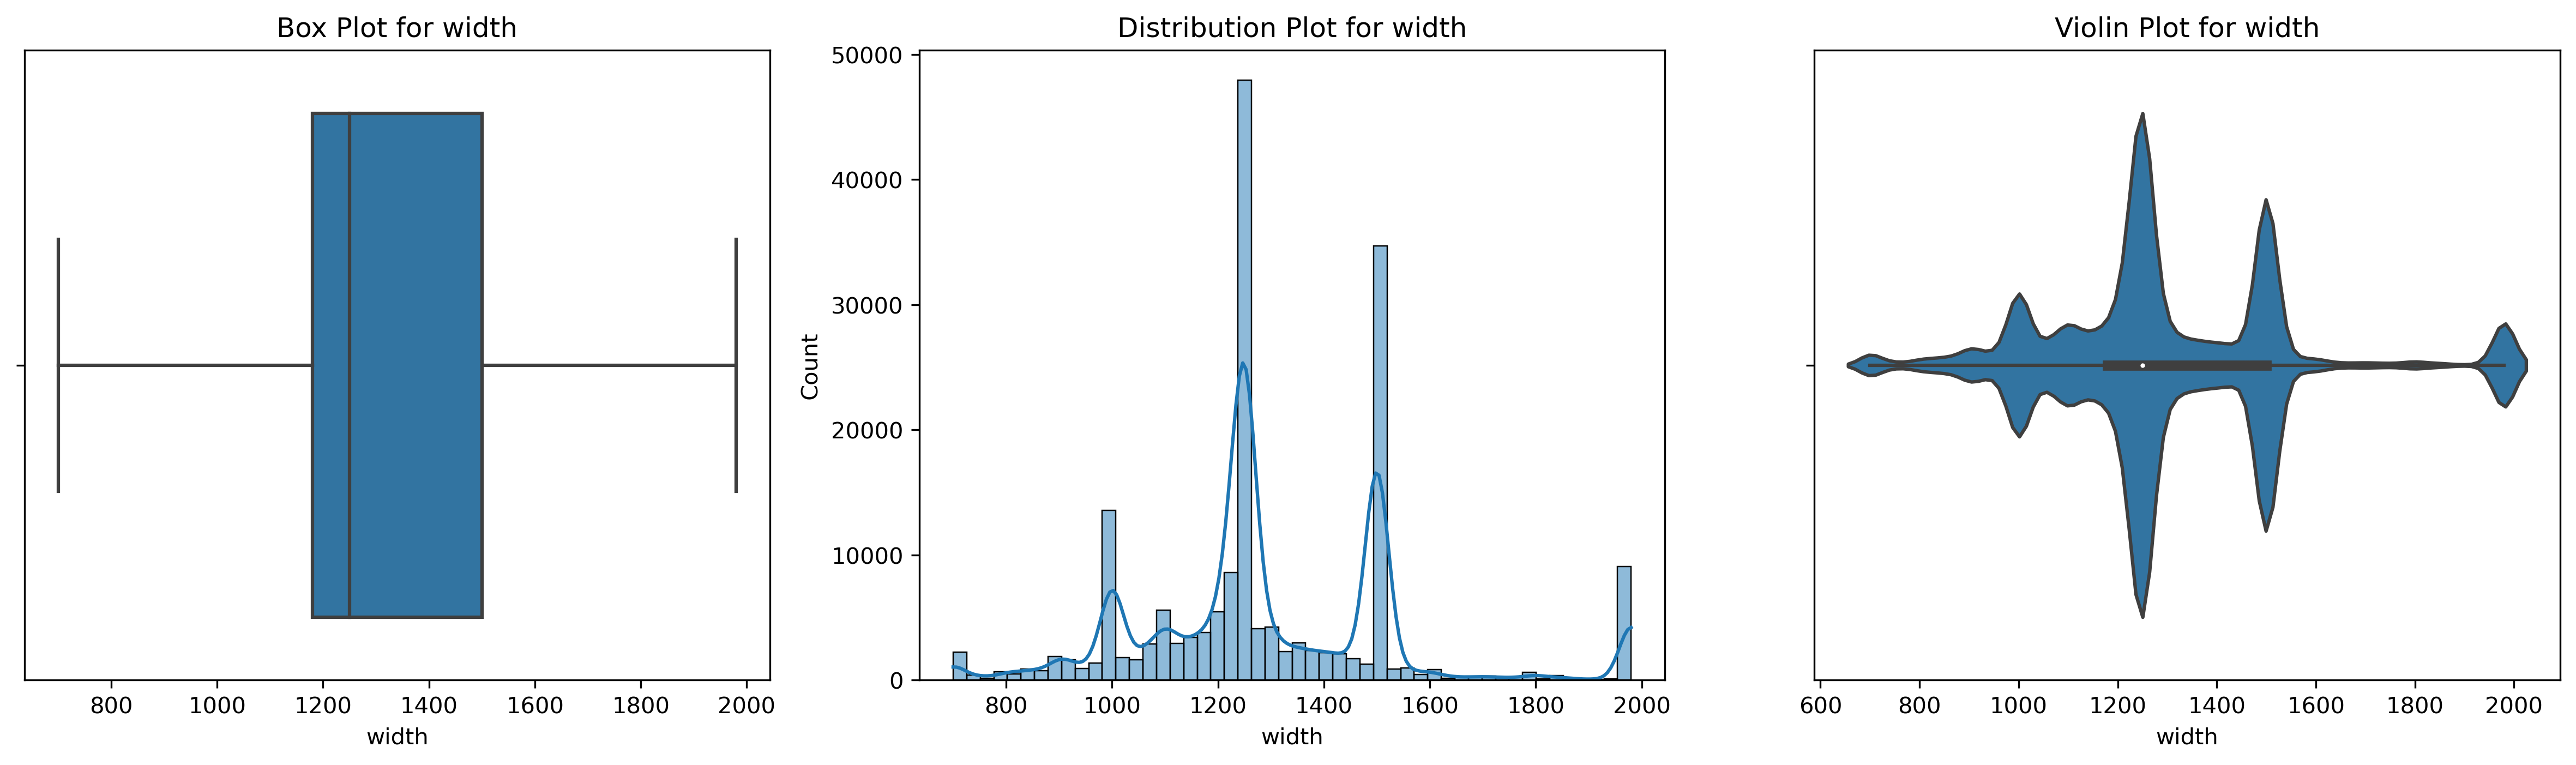

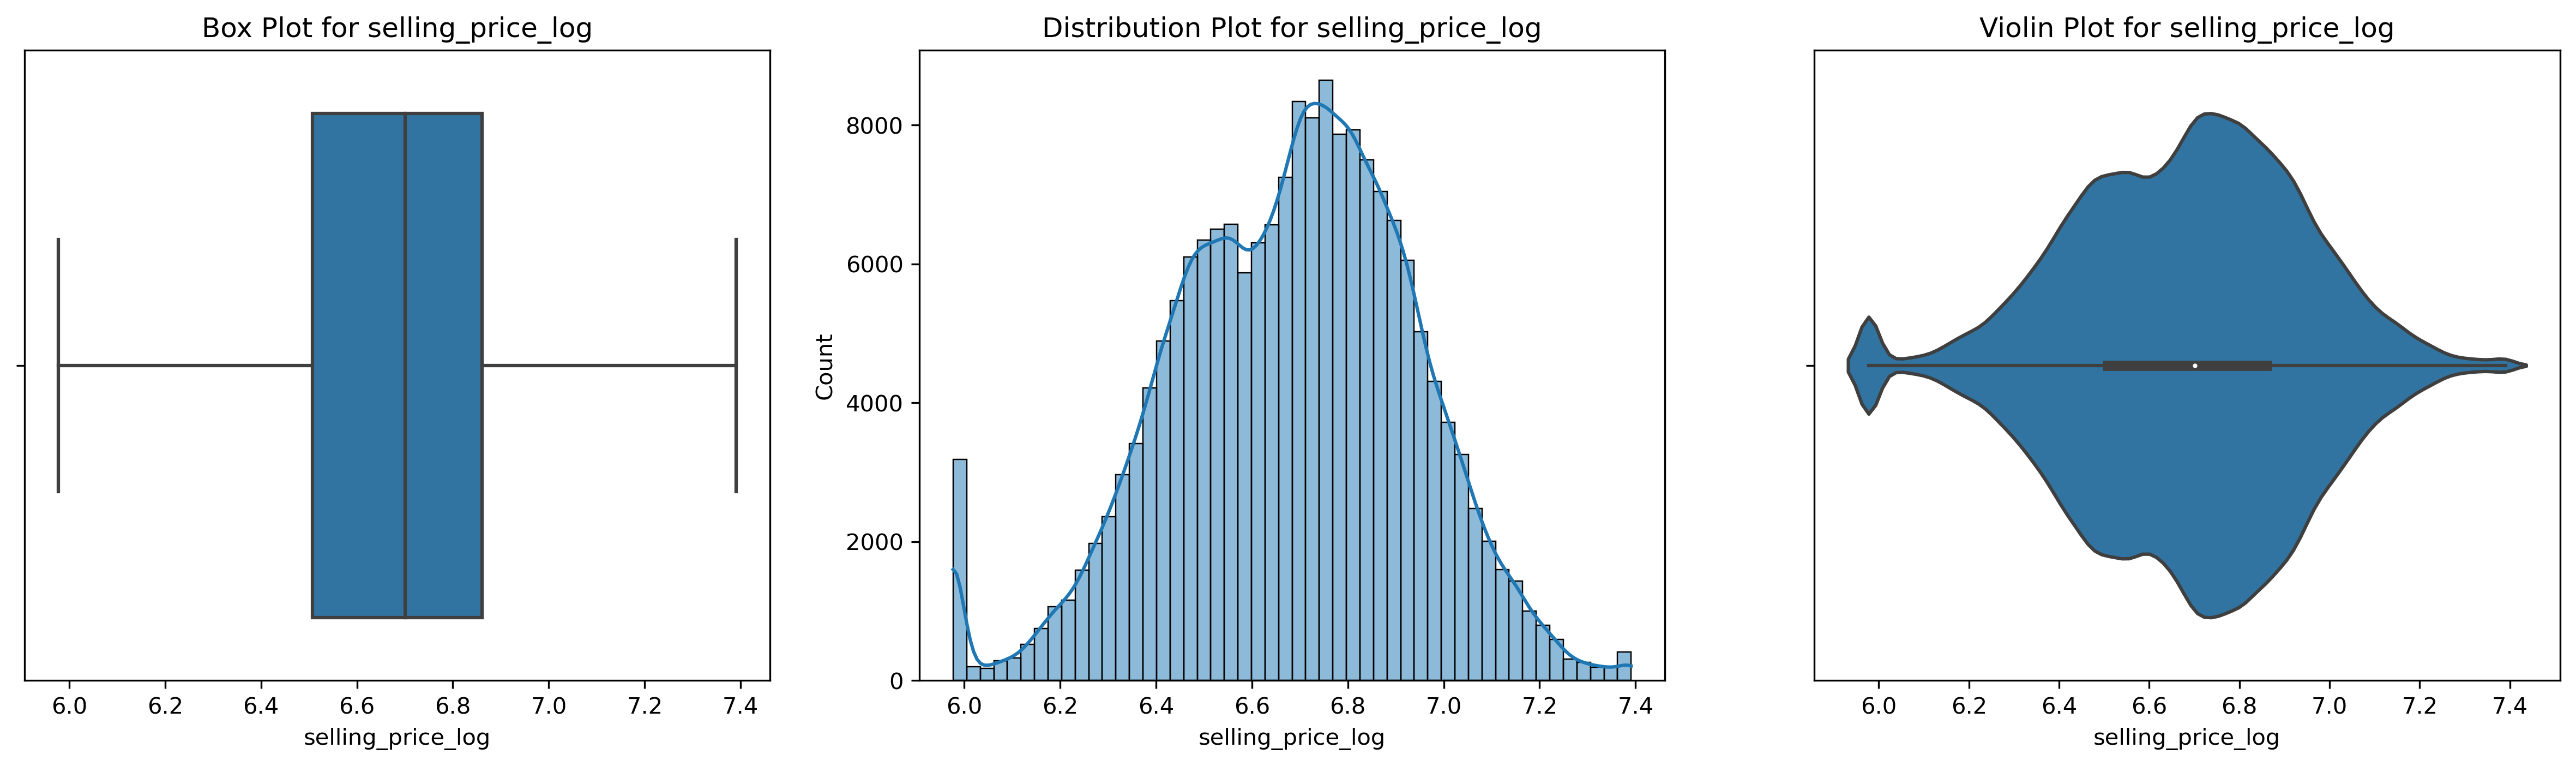

In [30]:
# Visualize columns after outliers removal 
for i in ["quantity_tons_log", "thickness_log", "width", "selling_price_log"]:
    plot(df, i)

## 4.6 Correlation Analysis

In [31]:
# Drop original data transformed columns
df2 = df.drop(["quantity tons", "thickness", "selling_price"], axis= 1)

In [32]:
df2.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,4.010077,1.098612,6.751101
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.645123,0.587787,6.954639
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.958755,0.322083,6.469762
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.315229,1.193922,6.645091
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.667626,1.609438,6.359574


<AxesSubplot:>

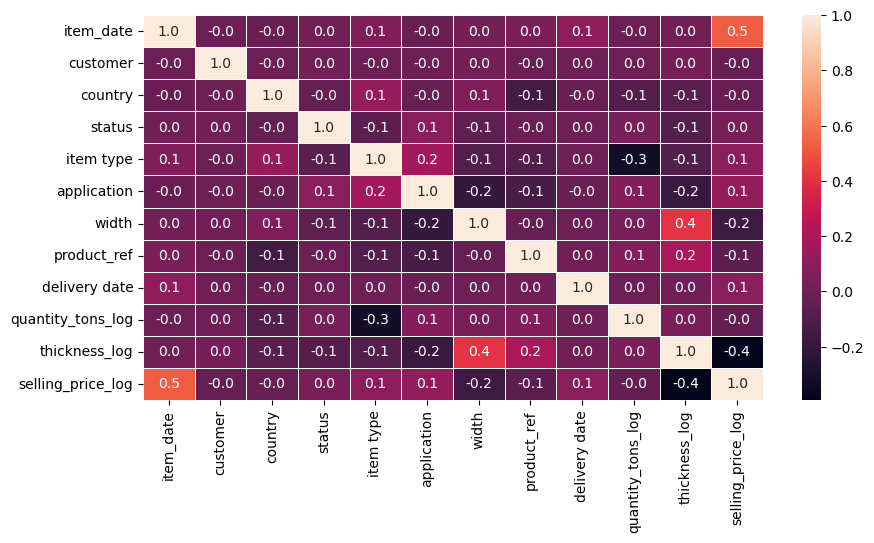

In [33]:
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(df2.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

**Note:**
- The higher numbers seen are 0.4 and -0.4, hence there isn't any correlated columns.
- Non-linear relationship is seen in the dataset.

# 5. Data Analysis

## 5.1 Handling Wrong Delivery Date 

In [34]:
df2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,4.010077,1.098612,6.751101
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.645123,0.587787,6.954639
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.958755,0.322083,6.469762
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.315229,1.193922,6.645091
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.639402,0.672944,6.383507
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.342748,0.667829,6.380123
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.655480,0.536493,6.429719
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.445693,0.615186,6.400257


**Note:**
- The *delivery date* is previous of *item_date*, which is not possible. delivery date should be higher.

In [35]:
# Convert data type 
df2['item_date_1'] = pd.to_datetime(df2['item_date_1'])
df2['delivery date_1'] = pd.to_datetime(df2['delivery date_1'])

In [36]:
# Difference between item and delivery date
df2['Date_difference'] = (df2['delivery date_1'] - df2['item_date_1']).dt.days
df2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,4.010077,1.098612,6.751101,91
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.645123,0.587787,6.954639,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.958755,0.322083,6.469762,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.315229,1.193922,6.645091,-90
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.667626,1.609438,6.359574,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.639402,0.672944,6.383507,-1
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.342748,0.667829,6.380123,-1
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.655480,0.536493,6.429719,-1
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.445693,0.615186,6.400257,-1


In [37]:
# Split the day, month, and year from 'item_date' column and add dataframe (for prediction)
df2['item_date_day'] = df2['item_date_1'].dt.day
df2['item_date_month'] = df2['item_date_1'].dt.month
df2['item_date_year'] = df2['item_date_1'].dt.year
df2.head(10)

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,4.010077,1.098612,6.751101,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.645123,0.587787,6.954639,0,1,4,2021
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.958755,0.322083,6.469762,-90,1,4,2021
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.315229,1.193922,6.645091,-90,1,4,2021
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.667626,1.609438,6.359574,-31,1,4,2021
5,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.424027,0.916291,6.891626,0,1,4,2021
6,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.509090,0.322083,5.977199,91,1,4,2021
7,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.739589,0.518794,6.837333,-90,1,4,2021
8,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.249521,0.470004,7.218177,91,1,4,2021
9,20210401.0,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.448299,0.916291,6.891626,0,1,4,2021


In [38]:
# Split data => positive and negative "Date_difference"
df_pos = df2[df2["Date_difference"]>=0]
df_pos.head()


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,4.010077,1.098612,6.751101,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.645123,0.587787,6.954639,0,1,4,2021
5,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.424027,0.916291,6.891626,0,1,4,2021
6,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.509090,0.322083,5.977199,91,1,4,2021
8,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.249521,0.470004,7.218177,91,1,4,2021


In [39]:
# After split, the index values are unordered. so need to reset the index to ascending order from 0
df_pos = df_pos.reset_index(drop=True)
df_pos.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,4.010077,1.098612,6.751101,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.645123,0.587787,6.954639,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.424027,0.916291,6.891626,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.509090,0.322083,5.977199,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.249521,0.470004,7.218177,91,1,4,2021


In [40]:
# Split data => negative "Date_difference"
df_neg = df2[df2["Date_difference"]<0]

# After split, the index values are unordered. so need to reset the index to ascending order from 0
df_neg = df_neg.reset_index(drop=True)
df_neg.head()


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.958755,0.322083,6.469762,-90,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.315229,1.193922,6.645091,-90,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.667626,1.609438,6.359574,-31,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.739589,0.518794,6.837333,-90,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.744894,0.438255,6.861711,-90,1,4,2021


**Note:**
- 1,65,565 values of correct delivery date and 16,108 values of wrong delivery date are present.
- The correctly delivered data will train ML model and predict the "Date_difference" of wrong delivery data.
- *"Date_difference"* is a continuous variable hence, `regression model` is selected for prediction.

## 5.2 Regression Model Selection


In [47]:
# Find the best prediction model with MSE, RMSE, R^2, MAE.
# "item_date_1", "delivery date_1" columns are non-numerical and cannot be passed.
 
def evaluate_Reg_model(df: pd.DataFrame, algorithms: list):
    """
    Evaluate various regression models based on MSE, RMSE, R^2, MAE.

    Args:
        df: The input dataframe containing features and target variables
        algorithm: A list of regression model classes.

    Returns:
        pd.DataFrame: A df summarizing the performance metrics. 
    """

    results = []
    for algorithm in algorithms:
        x = df.drop(columns=["item_date_1", "delivery date_1", "Date_difference"], axis= 1)
        y = df["Date_difference"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        metrics = {"Model": algorithm.__name__,
                   "MSE": mse,
                   "RMSE": rmse,
                   "R^2": r2,
                   "MAE": mae}
        results.append(metrics)

    # Convert dictionary to dataframe
    df = pd.DataFrame(results).round(4)
    
    return df

In [48]:
# # Evaluate regression models
# reg_algorithms = [DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, XGBRegressor]

# df_reg_performance = evaluate_Reg_model(df_pos, reg_algorithms)
# df_reg_performance

,Model,MSE,RMSE,R^2,MAE
0,DecisionTreeRegressor,4.84,2.20,1.00,0.02
1,ExtraTreesRegressor,1.14,1.07,1.00,0.02
2,RandomForestRegressor,4.38,2.09,1.00,0.02
3,AdaBoostRegressor,400.57,20.01,0.74,16.44
4,GradientBoostingRegressor,18.67,4.32,0.99,2.95
5,XGBRegressor,4.24,2.06,1.00,0.22


**Inference:**
- If MSE, RMSE, MAE are low, then the  model is better.
- R^2 should be more for a good model.
- `ExtraTreesRegressor` performs well with low MSE, RMSE, and MAE and high R^2.

In [53]:
# Train model by using Extra Trees Regressor algorithm to predict "Date_difference"
def ml_date_difference(df_pos, df_neg):
    # Train model using correct delivery date from df_pos
    x = df_pos.drop(columns=["item_date_1", "delivery date_1", "Date_difference"], axis= 1)
    y = df_pos["Date_difference"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

    model = ExtraTreesRegressor().fit(x_train, y_train)

    # Predict "Date_difference" of df_neg using ml model
    y_pred_list = []

    for index, row in df_neg.iterrows():
        input_data = row.drop(["item_date_1", "delivery date_1", "Date_difference"])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [54]:
# Predict "Date_difference" in df_neg
df_neg_date_diff = ml_date_difference(df_pos, df_neg)
print(df_neg_date_diff[:10])

In [55]:
# Print first 10 date differences from prediction
print(df_neg_date_diff[:10])

[18.06, 19.45, 6.14, 17.82, 17.82, 18.71, 18.71, 18.71, 195.55, 4.69]


In [56]:
# Round off - Date_difference
df_neg_date_diff_1 = [int(round(i,0)) for i in df_neg_date_diff]
print(df_neg_date_diff_1[:10])

[18, 19, 6, 18, 18, 19, 19, 19, 196, 5]


In [57]:
# Add predicted "Date_difference" to df_neg
df_neg["Date_difference"] = pd.DataFrame(df_neg_date_diff_1)
df_neg.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.958755,0.322083,6.469762,18,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.315229,1.193922,6.645091,19,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.667626,1.609438,6.359574,6,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.739589,0.518794,6.837333,18,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.744894,0.438255,6.861711,18,1,4,2021


In [59]:
# Calculate delivery date (item date + date difference)

def calc_delivery_date(item_date, date_difference):
    result_date = item_date + timedelta(days= date_difference)
    delivery_date = result_date.strftime("%Y-%m-%d")
    return delivery_date

In [60]:
# Calculate delivery date and add it to dataframe

df_neg["item_date_1"] = pd.to_datetime(df_neg["item_date_1"])
df_neg["delivery date_1"] = df_neg.apply(lambda x: calc_delivery_date(x["item_date_1"], x["Date_difference"]), axis= 1)
df_neg.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-19,5.958755,0.322083,6.469762,18,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-20,5.315229,1.193922,6.645091,19,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-04-07,6.667626,1.609438,6.359574,6,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-19,4.739589,0.518794,6.837333,18,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-19,4.744894,0.438255,6.861711,18,1,4,2021


Now, the delivery date has been rightfully updated in the dataframe.

In [61]:
# Combine both dataframe into a single dataframe
df_final = pd.concat([df_pos, df_neg], axis= 0, ignore_index= True)
df_final


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01 00:00:00,4.010077,1.098612,6.751101,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,6.645123,0.587787,6.954639,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,5.424027,0.916291,6.891626,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01 00:00:00,1.509090,0.322083,5.977199,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01 00:00:00,4.249521,0.470004,7.218177,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.639402,0.672944,6.383507,30,2,7,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.342748,0.667829,6.380123,30,2,7,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.655480,0.536493,6.429719,30,2,7,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.445693,0.615186,6.400257,30,2,7,2020


In [62]:
# Split the day, month, and year from 'delivery_date_1' column and add dataframe (for prediction)

df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])

df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year

# finally drop the item_date, delivery_date and date_difference columns
df_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','Date_difference'], inplace=True)
df_final

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.645123,0.587787,6.954639,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.424027,0.916291,6.891626,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.509090,0.322083,5.977199,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.639402,0.672944,6.383507,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.342748,0.667829,6.380123,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.655480,0.536493,6.429719,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.445693,0.615186,6.400257,2,7,2020,1,8,2020


In [63]:
# Save the data
df_final.to_csv('Data/final_data.csv', index=False)

# 6. Classification - "status" Prediction

In [2]:
df_final = pd.read_csv("Data/final_data.csv")
df_final.head()

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.645123,0.587787,6.954639,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.424027,0.916291,6.891626,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.509090,0.322083,5.977199,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,1,4,2021,1,7,2021


In [5]:
# Filter status of "1" and "0" into a new dataframe ["won":1, "lost": 0]
df_c = df_final[(df_final["status"]==1) | (df_final["status"]==0)]
df_c.head()

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.645123,0.587787,6.954639,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.424027,0.916291,6.891626,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.448299,0.916291,6.891626,1,4,2021,1,4,2021


status count of 1 and 0:
 1    116012
0     34438
Name: status, dtype: int64


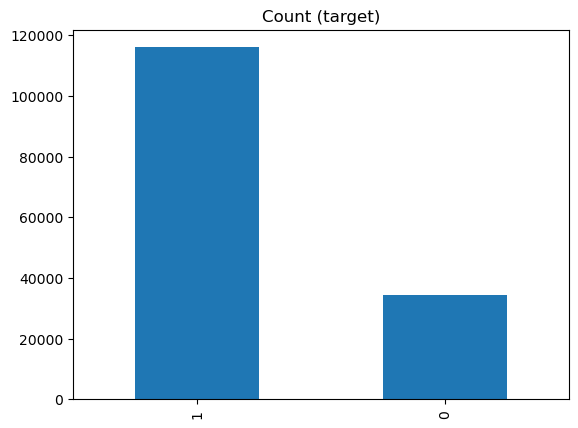

In [7]:
# print the number of status count
print('status count of 1 and 0:\n', df_c['status'].value_counts())

# plot the count
df_c['status'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

**Inference:**
- The "won" and "lost" value difference in status feature is very high.
- Balance the dataset.

## 6.1 Balance Data

In [10]:
# Prepare dataset
x = df_c.drop('status', axis=1)
y = df_c['status']

rus = RandomUnderSampler(random_state=42, replacement=True)
ros = RandomOverSampler(random_state=42)
smote = SMOTE()

# Fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)
x_ros, y_ros = ros.fit_resample(x, y)
x_smote , y_smote = smote.fit_resample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))
print('Resample dataset shape', Counter(y_ros))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({1: 116012, 0: 34438})
Resample dataset shape Counter({0: 34438, 1: 34438})
Resample dataset shape Counter({1: 116012, 0: 116012})
Resampple dataset shape: Counter({1: 116012, 0: 116012})


In [11]:
# Find the best classification model with roc_auc_score, accuracy_score, f1_score.
 
def evaluate_class_model(x, y, algorithms: list):
    """
    Evaluate various classification model with roc_auc_score, accuracy_score, f1_score.

    Args:
        x: The input features 
        y: target variable
        algorithm: A list of classification model classes.

    Returns:
        pd.DataFrame: A df summarizing the performance metrics. 
    """

    results = []
    for algorithm in algorithms:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)

        metrics = {"Model": algorithm.__name__,
                   "ROCAUC score": roc_auc_score(y_test, y_pred),
                   "Accuracy score": accuracy_score(y_test, y_pred),
                   "F1 score": f1_score(y_test, y_pred)}
        results.append(metrics)

    # Convert dictionary to dataframe
    df = pd.DataFrame(results).round(4)
    
    return df

In [12]:
# Evaluate classification models
class_algorithms = [DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]

# df_class_performance = evaluate_class_model(x, y, class_algorithms)
# df_class_performance

,Model,ROCAUC score,Accuracy score,F1 score
0,DecisionTreeClassifier,0.9324,0.9512,0.9683
1,ExtraTreesClassifier,0.9604,0.9738,0.9830
2,RandomForestClassifier,0.9560,0.9706,0.9810
3,AdaBoostClassifier,0.6636,0.8128,0.8855
4,GradientBoostingClassifier,0.6871,0.8338,0.8988
5,XGBClassifier,0.8970,0.9352,0.9584


In [13]:
# df_class_performance_rus = evaluate_class_model(x_rus, y_rus, class_algorithms)
# df_class_performance_rus

,Model,ROCAUC score,Accuracy score,F1 score
0,DecisionTreeClassifier,0.9313,0.9313,0.9321
1,ExtraTreesClassifier,0.9621,0.9619,0.9618
2,RandomForestClassifier,0.9587,0.9585,0.9582
3,AdaBoostClassifier,0.7518,0.7518,0.7536
4,GradientBoostingClassifier,0.7934,0.7931,0.7899
5,XGBClassifier,0.9279,0.9276,0.9264


In [14]:
df_class_performance_ros = evaluate_class_model(x_ros, y_ros, class_algorithms)
df_class_performance_ros

,Model,ROCAUC score,Accuracy score,F1 score
0,DecisionTreeClassifier,0.9808,0.9810,0.9805
1,ExtraTreesClassifier,0.9903,0.9904,0.9902
2,RandomForestClassifier,0.9875,0.9876,0.9874
3,AdaBoostClassifier,0.7448,0.7449,0.7401
4,GradientBoostingClassifier,0.7937,0.7940,0.7863
5,XGBClassifier,0.9413,0.9416,0.9395


In [15]:
# df_class_performance_s = evaluate_class_model(x_smote, y_smote, class_algorithms)
# df_class_performance_s

,Model,ROCAUC score,Accuracy score,F1 score
0,DecisionTreeClassifier,0.9624,0.9624,0.9620
1,ExtraTreesClassifier,0.9839,0.9840,0.9837
2,RandomForestClassifier,0.9823,0.9824,0.9820
3,AdaBoostClassifier,0.7634,0.7634,0.7605
4,GradientBoostingClassifier,0.8124,0.8126,0.8082
5,XGBClassifier,0.9461,0.9463,0.9449


**Inference:**
- The dataset with oversampling technique produced higher accuracy compared to all the methods. 
- Hence the dataset will be balanced with oversampling technique and used on Extra Trees Classifier.

## 6.2 Extra Trees classifier

In [16]:
# Predict status and check accuracy
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

classifier = ExtraTreesClassifier()
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(result1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train:",accuracy_train," Accuracy test: ",accuracy_test)

Confusion Matrix:
[[23365    80]
 [  377 22583]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     23445
           1       1.00      0.98      0.99     22960

    accuracy                           0.99     46405
   macro avg       0.99      0.99      0.99     46405
weighted avg       0.99      0.99      0.99     46405

Accuracy train: 1.0  Accuracy test:  0.9901519232841288


## 6.3 ROC - AUC Curve
- Binary classification
- `roc_auc_score` calculates the Area Under the Curve (AUC) of the ROC curve, representing the model's ability to distinguish between classes.

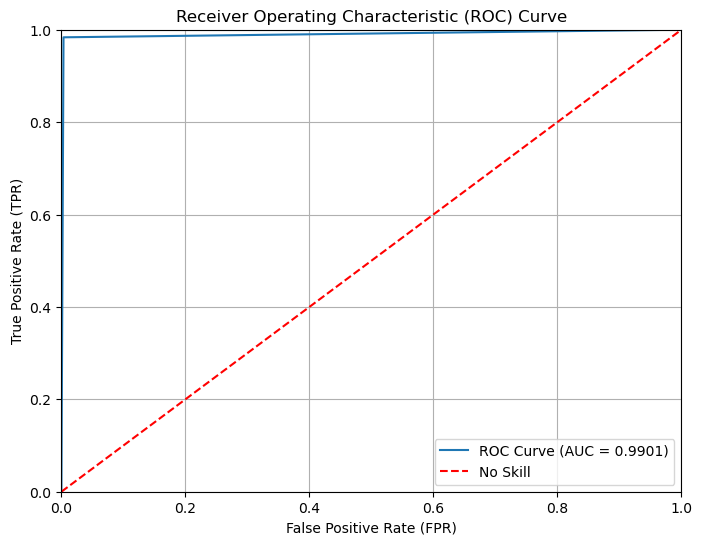

In [18]:
# Calculate ROC curve metrics (fpr, tpr, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')  # Include AUC in label
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No Skill')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [19]:
# Pass the user data manually to check the prediction of status ar our model

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_p = classifier.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [20]:
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = classifier.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


## 6.4 Save the Classification Model

In [21]:
# Save the classification model by using pickle

with open('Model/classification_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [2]:
# Load pickle model to predict the status.

with open('Model/classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


# 7. Regression - "selling_price" Prediction

In [23]:
df_final.head()

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.645123,0.587787,6.954639,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.424027,0.916291,6.891626,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.509090,0.322083,5.977199,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,1,4,2021,1,7,2021


In [24]:
# Find the best prediction model with MSE, RMSE, R^2, MAE.
 
def evaluate_Reg_model_sp(df: pd.DataFrame, algorithms: list):
    """
    Evaluate various regression models based on MSE, RMSE, R^2, MAE.

    Args:
        df: The input dataframe containing features and target variables
        algorithm: A list of regression model classes.

    Returns:
        pd.DataFrame: A df summarizing the performance metrics. 
    """

    results = []
    for algorithm in algorithms:
        x = df_c.drop('selling_price_log', axis=1)
        y = df_c['selling_price_log']
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        metrics = {"Model": algorithm.__name__,
                   "MSE": mse,
                   "RMSE": rmse,
                   "R^2": r2,
                   "MAE": mae}
        results.append(metrics)

    # Convert dictionary to dataframe
    df = pd.DataFrame(results).round(4)
    
    return df

In [27]:
# Evaluate regression models
reg_algorithms = [ExtraTreesRegressor, XGBRegressor]

df_reg_performance = evaluate_Reg_model_sp(df_final, reg_algorithms)
df_reg_performance

,Model,MSE,RMSE,R^2,MAE
0,ExtraTreesRegressor,0.0025,0.0498,0.9566,0.0301
1,XGBRegressor,0.0031,0.0554,0.9462,0.0386


**Inference:**
- `ExtraTreesRegressor` technique performed well in predicting selling price of the dataset.

In [28]:
# Train the model and predict "selling_price_log"
x = df_c.drop('selling_price_log', axis=1)
y = df_c['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

model = ExtraTreesRegressor().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R^2 score train:", r2_train, " R^2 score test: ", r2_test)

R^2 score train: 0.9999715704991267  R^2 score test:  0.9565034440250026


In [29]:
# manually passed the user input and predict the selling price

user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

6.9834884645277295

In [30]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

1078.674729748966

In [31]:
# save the regression model by using pickle

with open('Model/regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [32]:
# load the pickle model to predict selling price

with open('Model/regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])

1078.674729748966